## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.197777 -1.661403 -0.027717  1.171018  1.598632 -0.071377
1  0.551548  0.187125  0.440033  0.886580  0.319907  1.137253
2 -0.615991  0.476471 -0.117576 -0.776233  0.039379 -0.811109
3  0.569164  0.116894  0.984451  0.741810 -1.255506  0.807663
4 -0.892024  0.271271  0.472820  1.230137 -1.229826 -0.265961


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9291461	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9206966	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9106152	total: 70.6ms	remaining: 23.4s
3:	learn: 0.9001028	total: 71.1ms	remaining: 17.7s
4:	learn: 0.8925464	total: 71.8ms	remaining: 14.3s
5:	learn: 0.8834568	total: 72.5ms	remaining: 12s
6:	learn: 0.8737446	total: 73ms	remaining: 10.4s
7:	learn: 0.8653952	total: 73.7ms	remaining: 9.13s
8:	learn: 0.8570904	total: 74.4ms	remaining: 8.19s
9:	learn: 0.8492101	total: 75ms	remaining: 7.42s
10:	learn: 0.8395576	total: 75.6ms	remaining: 6.8s
11:	learn: 0.8313499	total: 76.3ms	remaining: 6.28s
12:	learn: 0.8218410	total: 76.8ms	remaining: 5.83s
13:	learn: 0.8127563	total: 77.4ms	remaining: 5.45s
14:	learn: 0.8061218	total: 77.9ms	remaining: 5.11s
15:	learn: 0.7988712	total: 78.3ms	remaining: 4.82s
16:	learn: 0.7906989	total: 78.8ms	remaining: 4.55s
17:	learn: 0.7816078	total: 79.3ms	remaining: 4.33s
18:	learn: 0.7742520	total: 79.7ms	remaining: 4.12s

78:	learn: 0.4478576	total: 108ms	remaining: 1.26s
79:	learn: 0.4439231	total: 109ms	remaining: 1.25s
80:	learn: 0.4398957	total: 109ms	remaining: 1.24s
81:	learn: 0.4362779	total: 110ms	remaining: 1.23s
82:	learn: 0.4326214	total: 110ms	remaining: 1.22s
83:	learn: 0.4291718	total: 110ms	remaining: 1.2s
84:	learn: 0.4251071	total: 111ms	remaining: 1.19s
85:	learn: 0.4227121	total: 111ms	remaining: 1.18s
86:	learn: 0.4186550	total: 112ms	remaining: 1.17s
87:	learn: 0.4154392	total: 112ms	remaining: 1.16s
88:	learn: 0.4114553	total: 113ms	remaining: 1.15s
89:	learn: 0.4079837	total: 113ms	remaining: 1.14s
90:	learn: 0.4049283	total: 114ms	remaining: 1.13s
91:	learn: 0.4015217	total: 114ms	remaining: 1.12s
92:	learn: 0.3982712	total: 114ms	remaining: 1.11s
93:	learn: 0.3947045	total: 115ms	remaining: 1.11s
94:	learn: 0.3914002	total: 115ms	remaining: 1.1s
95:	learn: 0.3881293	total: 116ms	remaining: 1.09s
96:	learn: 0.3855790	total: 116ms	remaining: 1.08s
97:	learn: 0.3823785	total: 116ms

237:	learn: 0.1376961	total: 188ms	remaining: 601ms
238:	learn: 0.1367357	total: 189ms	remaining: 600ms
239:	learn: 0.1358938	total: 189ms	remaining: 599ms
240:	learn: 0.1350556	total: 190ms	remaining: 597ms
241:	learn: 0.1344537	total: 190ms	remaining: 596ms
242:	learn: 0.1336246	total: 191ms	remaining: 594ms
243:	learn: 0.1326766	total: 191ms	remaining: 592ms
244:	learn: 0.1318714	total: 192ms	remaining: 591ms
245:	learn: 0.1312146	total: 192ms	remaining: 590ms
246:	learn: 0.1303490	total: 193ms	remaining: 588ms
247:	learn: 0.1295536	total: 193ms	remaining: 587ms
248:	learn: 0.1287081	total: 194ms	remaining: 585ms
249:	learn: 0.1278219	total: 195ms	remaining: 584ms
250:	learn: 0.1269494	total: 195ms	remaining: 582ms
251:	learn: 0.1261012	total: 196ms	remaining: 580ms
252:	learn: 0.1250655	total: 196ms	remaining: 579ms
253:	learn: 0.1240553	total: 197ms	remaining: 578ms
254:	learn: 0.1233038	total: 197ms	remaining: 576ms
255:	learn: 0.1224213	total: 198ms	remaining: 575ms
256:	learn: 

439:	learn: 0.0461564	total: 292ms	remaining: 372ms
440:	learn: 0.0459148	total: 293ms	remaining: 371ms
441:	learn: 0.0456858	total: 294ms	remaining: 371ms
442:	learn: 0.0454792	total: 294ms	remaining: 370ms
443:	learn: 0.0452727	total: 295ms	remaining: 369ms
444:	learn: 0.0450582	total: 295ms	remaining: 368ms
445:	learn: 0.0449331	total: 296ms	remaining: 367ms
446:	learn: 0.0448089	total: 296ms	remaining: 366ms
447:	learn: 0.0445873	total: 297ms	remaining: 366ms
448:	learn: 0.0443898	total: 297ms	remaining: 365ms
449:	learn: 0.0442727	total: 298ms	remaining: 364ms
450:	learn: 0.0441153	total: 298ms	remaining: 363ms
451:	learn: 0.0439229	total: 299ms	remaining: 362ms
452:	learn: 0.0437438	total: 299ms	remaining: 361ms
453:	learn: 0.0436260	total: 300ms	remaining: 361ms
454:	learn: 0.0434153	total: 300ms	remaining: 360ms
455:	learn: 0.0432257	total: 301ms	remaining: 359ms
456:	learn: 0.0430206	total: 301ms	remaining: 358ms
457:	learn: 0.0428205	total: 302ms	remaining: 357ms
458:	learn: 

590:	learn: 0.0250912	total: 372ms	remaining: 257ms
591:	learn: 0.0249750	total: 373ms	remaining: 257ms
592:	learn: 0.0248931	total: 373ms	remaining: 256ms
593:	learn: 0.0248201	total: 373ms	remaining: 255ms
594:	learn: 0.0247401	total: 374ms	remaining: 255ms
595:	learn: 0.0246522	total: 374ms	remaining: 254ms
596:	learn: 0.0245777	total: 375ms	remaining: 253ms
597:	learn: 0.0244768	total: 375ms	remaining: 252ms
598:	learn: 0.0244066	total: 376ms	remaining: 252ms
599:	learn: 0.0243378	total: 376ms	remaining: 251ms
600:	learn: 0.0242733	total: 377ms	remaining: 250ms
601:	learn: 0.0241757	total: 377ms	remaining: 249ms
602:	learn: 0.0240915	total: 377ms	remaining: 249ms
603:	learn: 0.0240089	total: 378ms	remaining: 248ms
604:	learn: 0.0239445	total: 379ms	remaining: 247ms
605:	learn: 0.0238826	total: 379ms	remaining: 246ms
606:	learn: 0.0238020	total: 379ms	remaining: 246ms
607:	learn: 0.0237482	total: 380ms	remaining: 245ms
608:	learn: 0.0236753	total: 380ms	remaining: 244ms
609:	learn: 

797:	learn: 0.0136251	total: 477ms	remaining: 121ms
798:	learn: 0.0136087	total: 477ms	remaining: 120ms
799:	learn: 0.0135832	total: 478ms	remaining: 119ms
800:	learn: 0.0135697	total: 478ms	remaining: 119ms
801:	learn: 0.0135536	total: 479ms	remaining: 118ms
802:	learn: 0.0135404	total: 480ms	remaining: 118ms
803:	learn: 0.0135247	total: 480ms	remaining: 117ms
804:	learn: 0.0134875	total: 481ms	remaining: 117ms
805:	learn: 0.0134625	total: 482ms	remaining: 116ms
806:	learn: 0.0134497	total: 482ms	remaining: 115ms
807:	learn: 0.0134343	total: 483ms	remaining: 115ms
808:	learn: 0.0134218	total: 483ms	remaining: 114ms
809:	learn: 0.0133858	total: 484ms	remaining: 113ms
810:	learn: 0.0133613	total: 484ms	remaining: 113ms
811:	learn: 0.0133464	total: 485ms	remaining: 112ms
812:	learn: 0.0133342	total: 485ms	remaining: 112ms
813:	learn: 0.0133195	total: 486ms	remaining: 111ms
814:	learn: 0.0132908	total: 486ms	remaining: 110ms
815:	learn: 0.0132560	total: 487ms	remaining: 110ms
816:	learn: 

953:	learn: 0.0100745	total: 556ms	remaining: 26.8ms
954:	learn: 0.0100359	total: 556ms	remaining: 26.2ms
955:	learn: 0.0100283	total: 557ms	remaining: 25.6ms
956:	learn: 0.0100039	total: 557ms	remaining: 25ms
957:	learn: 0.0099939	total: 558ms	remaining: 24.4ms
958:	learn: 0.0099657	total: 558ms	remaining: 23.9ms
959:	learn: 0.0099398	total: 558ms	remaining: 23.3ms
960:	learn: 0.0099153	total: 559ms	remaining: 22.7ms
961:	learn: 0.0099054	total: 559ms	remaining: 22.1ms
962:	learn: 0.0098609	total: 560ms	remaining: 21.5ms
963:	learn: 0.0098379	total: 560ms	remaining: 20.9ms
964:	learn: 0.0098305	total: 560ms	remaining: 20.3ms
965:	learn: 0.0098154	total: 561ms	remaining: 19.7ms
966:	learn: 0.0098011	total: 561ms	remaining: 19.2ms
967:	learn: 0.0097780	total: 562ms	remaining: 18.6ms
968:	learn: 0.0097706	total: 562ms	remaining: 18ms
969:	learn: 0.0097308	total: 563ms	remaining: 17.4ms
970:	learn: 0.0097162	total: 563ms	remaining: 16.8ms
971:	learn: 0.0096938	total: 563ms	remaining: 16.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

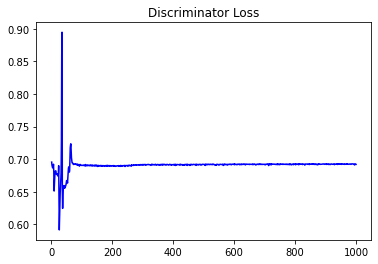

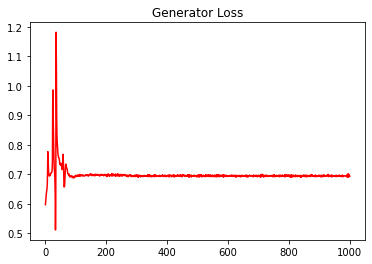

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07772946080797546


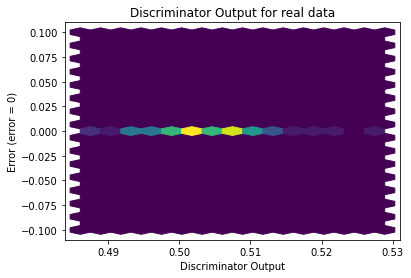

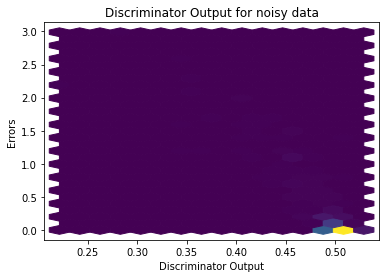

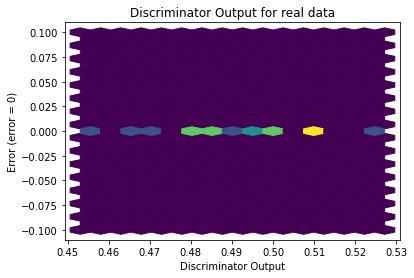

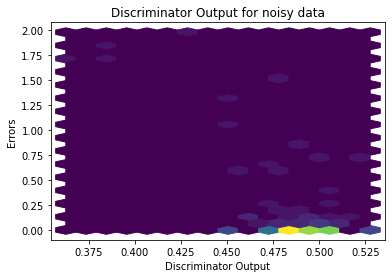

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


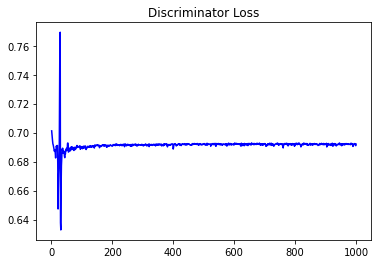

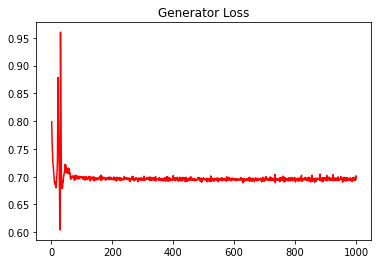

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05773678759298969


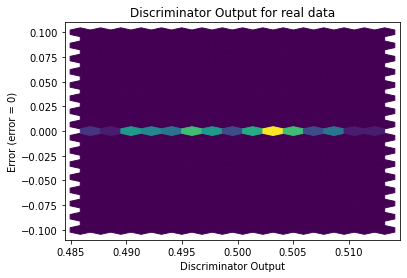

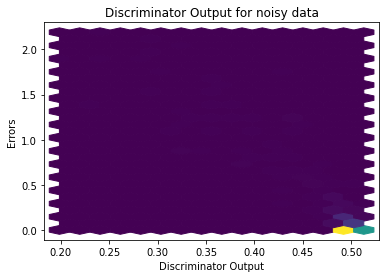

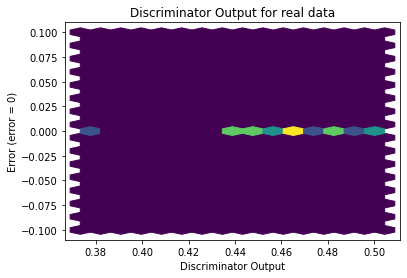

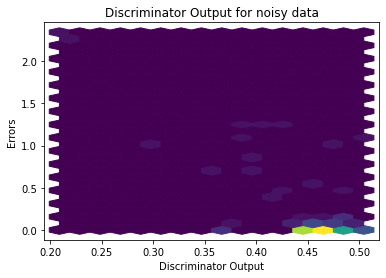

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8059]], requires_grad=True)
